# Multimodal Speech Emotion Recognition
<hr/>
<b>Description:</b> This notebook contains a demo application of a Multimodal Speech Emotion Recognition model trained audios and texts on the IEMOCAP dataset using 4 basic emotions.<br/>
<b>Author:</b> Jan Čuhel<br/>
<b>Date:</b> 17.3.2021<br/>
<b>Dataset:</b> IEMOCAP<br/>
<b>Emotions:</b> Basic - [happy + excited, sad, angry, neutral]<br/>


###Resources 
- https://ricardodeazambuja.com/deep_learning/2019/03/09/audio_and_video_google_colab/
- https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
- https://getemoji.com/
- https://realpython.com/python-speech-recognition/
- https://github.com/Uberi/speech_recognition#readme

### Installation

In [1]:
!pip install -q ffmpeg-python SpeechRecognition gTTS pydub

     |████████████████████████████████| 32.8MB 110kB/s 


### Connet to GitHub

In [2]:
!git clone https://github.com/HonzaCuhel/mser-thesis-app.git

Cloning into 'mser-thesis-app'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 51 (delta 16), reused 44 (delta 9), pack-reused 0
Unpacking objects: 100% (51/51), done.


### Imports

In [3]:
import sys
import matplotlib.pyplot as plt
import speech_recognition as sr
import gtts
import IPython.display as display

import warnings
warnings.filterwarnings('ignore')

sys.path.append('/content/mser-thesis-app/')
from record_audio import get_audio
from predict_emotion import predict_emotion

### Defining constants

In [4]:
lang = 'en'
dur = 11
emoji_dict = {"happy":"😊", "fear":"😱", "angry":"😡", "sad":"😢", "disgust":"🤮", "shame":"😳", "guilt":"😓", "neutral": "😐"}
NO = 'no'

### Definition of functions

In [5]:
def recognize_emotion(audio_file):
  # use the audio file as the audio source
  r = sr.Recognizer()
  with sr.AudioFile(audio_file) as source:
      audio = r.record(source, duration=dur)  # read the entire audio file
  
  # Resource: https://github.com/Uberi/speech_recognition/blob/master/examples/audio_transcribe.py
  # Recognize speech using Google Speech Recognition
  try:
      text = r.recognize_google(audio, language=lang)
  except sr.UnknownValueError:
      print("Google Speech Recognition could not understand audio")
      return ""
  except sr.RequestError as e:
      print("Could not request results from Google Speech Recognition service; {0}".format(e))
      return ""

  # Print what the user just has said
  print(f'You\'ve just said: {text}')
  
  # Return predicted emotion
  return predict_emotion(text, audio_file)


# def display_prediction(pred):
#   print(f'\nPredicted emotion: {pred} {emoji_dict[pred]}')

#   # make request to google to get synthesis
#   tts = gtts.gTTS(f'You are {pred}', lang=lang)

#   output_file = 'output_emotion.mp3'
#   tts.save(output_file)

#   # Play it
#   display.Audio(output_file, autoplay=True)

### Record a speech

In [6]:
audio, sample_rate, audio_file = get_audio()

### Plot the audio's waveform

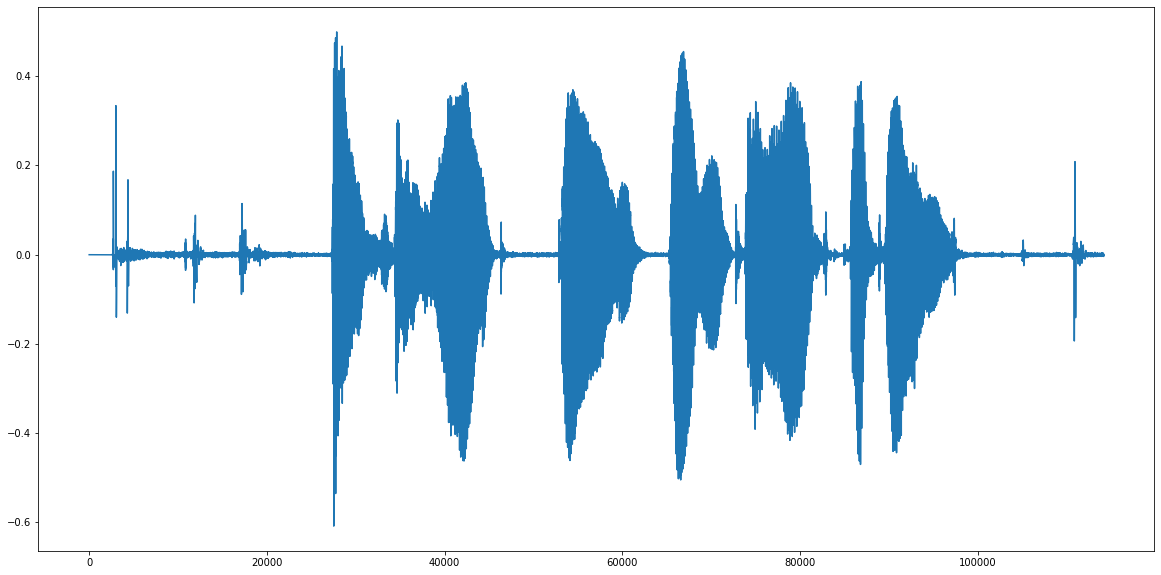

In [7]:
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

#### Emotion recognition

In [8]:
print('Welcome to the Multimodal Speech Emotion Recognizer app from audio and text!')
print('-'*80)
print('Help:')
print(' - record a speech and the program will recognize your emotion')
# print(f' - to end the program type "{NO}"')

print('Recognizing emotion...')
# Recognize the emotion
pred_emotion = recognize_emotion(audio_file)

# Check whether the emotion is not empty string (= the recognition was not succesful)
if pred_emotion == '':
  print('Something went wrong... Try again, please...')
else:
  # Display the results
  # display_prediction(pred_emotion)
  print(f'\nPredicted emotion: {pred_emotion} {emoji_dict[pred_emotion]}')

print('='*60)

Welcome to the Multimodal Speech Emotion Recognizer app from audio and text!
--------------------------------------------------------------------------------
Help:
 - record a speech and the program will recognize your emotion
Recognizing emotion...
You've just said: I feel like I am going to die

Predicted emotion: happy 😊


#### Audio output

In [9]:
# make request to google to get synthesis
tts = gtts.gTTS(f'You are {pred_emotion}', lang=lang)

output_file = 'output_emotion.mp3'
tts.save(output_file)

# Play it
display.Audio(output_file, autoplay=True)